<h1 align="center" color:blue> Review Analysis </h1>

## Steps

- Length of Review
- Number of Sentences
- Average Sentence Length
- Percentage of Question Sentence
- Number of Exclamation Mark
- Number of Upper case words (Fully Upper)
- Number of words with Proper Format (Upper followed by small case)
- Number of Emojis


## NLP

- Correct Spelling from the review
- Remove Stop Words
- Apply Lemmatization
- Create Unigram of the corpus
- Create Tf-Idf Matrix of the Corpus
- POS Tagging
- % Nouns
- % Verbs
- % Adjective
- % Adverbs

In [35]:
# Importing Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp=spacy.load('en_core_web_sm')
from sklearn.model_selection import train_test_split
from spacy.pipeline import SentenceSegmenter
import re
import warnings
warnings.filterwarnings('ignore')
import textblob
from textblob import TextBlob

# Customization of View
pd.options.display.max_columns = 999

In [36]:
df=pd.read_excel("Iphone7_new_features.xlsx",index_col="Sr_No")

In [37]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1102, 1104, 1105, 1198, 1204, 1206, 1207, 1229, 1230, 1259],
           dtype='int64', name='Sr_No', length=263)

In [38]:
df.columns

Index(['Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'Read', 'Sum_of_Up_Down',
       'No_of_Pics', 'Name', 'Gender', 'Unnamed: 13'],
      dtype='object')

In [39]:
df.head()

,Review_Title,Review_Text,Review_Rating,Buyer_Type,Review_Date,Upvote,Downvote,Read,Sum_of_Up_Down,No_of_Pics,Name,Gender,Unnamed: 13
Sr_No,,,,,,,,,,,,,
1,Classy product,Too good luv it\n iPhone is only camera lovers,5,Certified Buyer,4 months ago,704,88,NaN,792,2,Gulshan Khan,M,NaN
2,Must buy!,From last 5 years my younger brother was using...,5,Certified Buyer,4 months ago,2100,314,NaN,2414,0,Ezzazuddin Huseni,M,NaN
3,Excellent,I click this photo on wall painting,5,Certified Buyer,5 months ago,1062,160,NaN,1222,1,rock games,X,NaN
4,Pretty good,It was as expected ❤,4,Certified Buyer,4 months ago,1394,224,NaN,1618,1,Gracie Grace,F,NaN
5,Highly recommended,superb product...i liked it very much,5,Certified Buyer,2018-12-01 00:00:00,400,66,NaN,466,1,Swapnil Joshi,M,NaN


In [40]:
df=df.drop(["Name","Unnamed: 13"],axis=1)

### Length Of Reviews

In [41]:
df.Review_Text

Sr_No
1          Too good luv it\n iPhone is only camera lovers
2       From last 5 years my younger brother was using...
3                     I click this photo on wall painting
4                                    It was as expected ❤
5                   superb product...i liked it very much
                              ...                        
1206    I ordered iphone from SupercomNet\n And here o...
1207    I have used for only two weeks and the phone g...
1229    Awesome phone...I preordered the phone not onl...
1230    The IPhone 7 is a great device. There are no l...
1259    I received a defective product - the iphone wa...
Name: Review_Text, Length: 263, dtype: object

In [42]:
df["Len_before"] = df.Review_Text.apply(lambda x: len(x.split()))

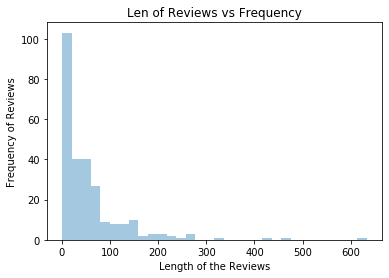

In [43]:
sns.distplot(df.Len_before,kde=False)
plt.xlabel("Length of the Reviews")
plt.ylabel("Frequency of Reviews")
plt.title("Len of Reviews vs Frequency")
plt.show()

In [44]:
df.Len_before.describe()

count    263.000000
mean      57.532319
std       76.299167
min        1.000000
25%        9.000000
50%       36.000000
75%       72.500000
max      633.000000
Name: Len_before, dtype: float64

### Number of Sentence

In [45]:
import nltk
def num_sentence(text):
    return len(nltk.sent_tokenize(text))

**Using Transformers to count the number of sentences is taking long time compared to English() in spacy.... (Experimented by Tamse) will be used going forward**

In [46]:
df['Num_Sentence']=df.Review_Text.apply(num_sentence)

### Average Sentence Length

In [47]:
df.Num_Sentence.mean()

4.034220532319392

### Number of Question Sentence

In [48]:
df['No_QMark'] = df.Review_Text.str.count(pat='\?')
df.No_QMark

Sr_No
1       0
2       0
3       0
4       0
5       0
       ..
1206    2
1207    0
1229    0
1230    0
1259    0
Name: No_QMark, Length: 263, dtype: int64

In [49]:
df.No_QMark.value_counts()

0    260
1      2
2      1
Name: No_QMark, dtype: int64

### Number of Exclamation Mark

In [50]:
df['No_ExMark']=df.Review_Text.str.count(pat='!').value_counts()
df.No_ExMark

Sr_No
1       14.0
2        9.0
3        3.0
4        3.0
5        1.0
        ... 
1206     NaN
1207     NaN
1229     NaN
1230     NaN
1259     NaN
Name: No_ExMark, Length: 263, dtype: float64

In [51]:
df.No_ExMark.value_counts()

1.0     3
3.0     2
2.0     1
9.0     1
14.0    1
Name: No_ExMark, dtype: int64

### Number of Upper case words (Fully Upper)

In [52]:
def count_upper(text):
    count=0
    for i in text.split():
        if text.isupper():
            count+=1
    return count

In [53]:
df['No_Upper']=df.Review_Text.apply(count_upper)

In [54]:
df.No_Upper.value_counts()

0    262
4      1
Name: No_Upper, dtype: int64

## Number of words with Proper Format

In [55]:
def count_proper(text):
    count=0
    for i in text.split():
        if text.istitle():
            count+=1
    return count

In [56]:
df['No_proper']=df.Review_Text.apply(count_proper).value_counts()

## Number of Emojis

In [57]:
import emoji
def emoji_count(text):
    return emoji.emoji_count(text)

In [58]:
df['Emoji_Count']=df.Review_Text.apply(emoji_count)

In [59]:
df.Emoji_Count.head()

Sr_No
1    0
2    0
3    0
4    1
5    0
Name: Emoji_Count, dtype: int64

# NLP

In [60]:
df.columns

Index(['Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'Read', 'Sum_of_Up_Down',
       'No_of_Pics', 'Gender', 'Len_before', 'Num_Sentence', 'No_QMark',
       'No_ExMark', 'No_Upper', 'No_proper', 'Emoji_Count'],
      dtype='object')

In [61]:
df["h"]=np.round(df.Upvote /(df.Upvote + df.Downvote),2)

In [62]:
df.columns

Index(['Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'Read', 'Sum_of_Up_Down',
       'No_of_Pics', 'Gender', 'Len_before', 'Num_Sentence', 'No_QMark',
       'No_ExMark', 'No_Upper', 'No_proper', 'Emoji_Count', 'h'],
      dtype='object')

<font color="red"><h3>Saving all feature in a csv</h3></font>

In [63]:
df.to_csv("withfeatures.csv")